TOPIC : RUSSIAN TROOPS AND EQUIPMENT LOSS PREDICTION ANALYSIS

//....THIS TOPIC IS COVERED ON THE BASIS OF THE DATASET CREATED WITH REGARDS OF THE ONGOING RUSSIA-UKRAINE WAR....//

MODEL USED HERE - RANDOM FOREST REGRESSOR

DATABASE TAKEN FROM KAGGLE.....

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data1 =pd.read_csv("/Users/subhajitpal/Desktop/Data Analysis using Python/equipment.csv")
data2 =pd.read_csv("/Users/subhajitpal/Desktop/Data Analysis using Python/troop.csv")                

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   5 non-null      object
 1   day                    5 non-null      object
 2   aircraft               5 non-null      int64 
 3   helicopter             5 non-null      int64 
 4   tank                   5 non-null      int64 
 5   APC                    5 non-null      int64 
 6   field artillery        5 non-null      int64 
 7   BUK                    5 non-null      int64 
 8   MRL                    5 non-null      int64 
 9   military auto          5 non-null      int64 
 10  fuel tank              5 non-null      int64 
 11  drone                  5 non-null      int64 
 12  naval ship             5 non-null      int64 
 13  anti-aircraft warfare  5 non-null      int64 
dtypes: int64(12), object(2)
memory usage: 688.0+ bytes


In [5]:
data1.describe()

,aircraft,helicopter,tank,APC,field artillery,BUK,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare
count,5.000000,5.00000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.0,5.000000,5.0,5.000000
mean,29.000000,29.20000,184.400000,826.000000,75.000000,1.0,26.200000,271.000000,60.0,2.800000,2.0,6.400000
std,1.224745,2.04939,33.960271,73.607065,15.858752,0.0,15.530615,139.016186,0.0,0.447214,0.0,4.219005
min,27.000000,26.00000,146.000000,706.000000,49.000000,1.0,4.000000,30.000000,60.0,2.000000,2.0,0.000000
25%,29.000000,29.00000,150.000000,816.000000,74.000000,1.0,21.000000,291.000000,60.0,3.000000,2.0,5.000000
50%,29.000000,29.00000,198.000000,846.000000,77.000000,1.0,24.000000,305.000000,60.0,3.000000,2.0,7.000000
75%,30.000000,31.00000,211.000000,862.000000,85.000000,1.0,40.000000,355.000000,60.0,3.000000,2.0,9.000000
max,30.000000,31.00000,217.000000,900.000000,90.000000,1.0,42.000000,374.000000,60.0,3.000000,2.0,11.000000


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   5 non-null      object
 1   day                    5 non-null      object
 2   aircraft               5 non-null      int64 
 3   helicopter             5 non-null      int64 
 4   tank                   5 non-null      int64 
 5   APC                    5 non-null      int64 
 6   field artillery        5 non-null      int64 
 7   BUK                    5 non-null      int64 
 8   MRL                    5 non-null      int64 
 9   military auto          5 non-null      int64 
 10  fuel tank              5 non-null      int64 
 11  drone                  5 non-null      int64 
 12  naval ship             5 non-null      int64 
 13  anti-aircraft warfare  5 non-null      int64 
dtypes: int64(12), object(2)
memory usage: 688.0+ bytes


In [6]:
data1.describe().columns

Index(['aircraft', 'helicopter', 'tank', 'APC', 'field artillery', 'BUK',
       'MRL', 'military auto', 'fuel tank', 'drone', 'naval ship',
       'anti-aircraft warfare'],
      dtype='object')

In [ ]:
data1.describe().rows

In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       5 non-null      object 
 1   day        5 non-null      object 
 2   personnel  5 non-null      int64  
 3   POW        1 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 288.0+ bytes


In [8]:
data2.describe()

,personnel,POW
count,5.000000,1.0
mean,6030.000000,200.0
std,1766.720125,NaN
min,4300.000000,200.0
25%,5300.000000,200.0
50%,5710.000000,200.0
75%,5840.000000,200.0
max,9000.000000,200.0


In [9]:
data2.describe().columns

Index(['personnel', 'POW'], dtype='object')

In [10]:
data1.isnull().sum()

date                     0
day                      0
aircraft                 0
helicopter               0
tank                     0
APC                      0
field artillery          0
BUK                      0
MRL                      0
military auto            0
fuel tank                0
drone                    0
naval ship               0
anti-aircraft warfare    0
dtype: int64

In [11]:
data2.isnull().sum()

date         0
day          0
personnel    0
POW          4
dtype: int64

In [39]:
data2['POW'].fillna(data2['POW'].mode()[0],inplace=True)
data2.isnull().any().any()

False

In [13]:
data1

,date,day,aircraft,helicopter,tank,APC,field artillery,BUK,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare
0,2022-02-26,"1,2,3",27,26,146,706,49,1,4,30,60,2,2,0
1,2022-02-28,"4,5",29,29,150,816,74,1,21,291,60,3,2,5
2,2022-03-01,6,29,29,198,846,77,1,24,305,60,3,2,7
3,2022-03-02,7,30,31,211,862,85,1,40,355,60,3,2,9
4,2022-03-03,8,30,31,217,900,90,1,42,374,60,3,2,11


In [14]:
data2

,date,day,personnel,POW
0,2022-02-26,"1,2,3",4300,200.0
1,2022-02-28,"4,5",5300,200.0
2,2022-03-01,6,5710,200.0
3,2022-03-02,7,5840,200.0
4,2022-03-03,8,9000,200.0


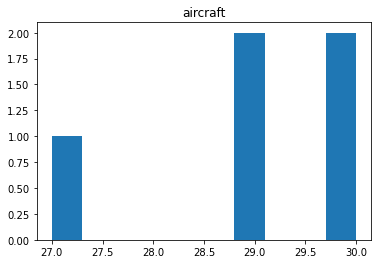

In [15]:
plt.hist(data1['aircraft'], bins=10)
plt.title("aircraft")
plt.show()

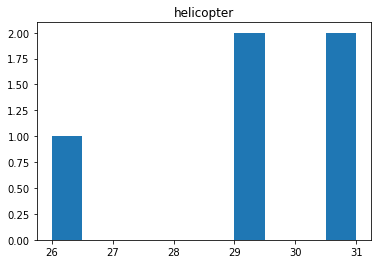

In [16]:
plt.hist(data1['helicopter'],bins=10)
plt.title("helicopter")
plt.show()

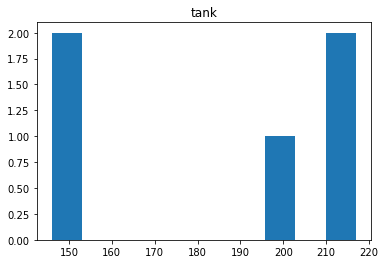

In [17]:
plt.hist(data1['tank'],bins=10)
plt.title("tank")
plt.show()

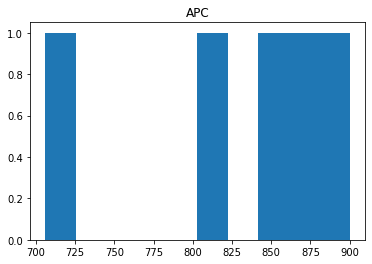

In [18]:
plt.hist(data1['APC'],bins=10)
plt.title("APC")
plt.show()

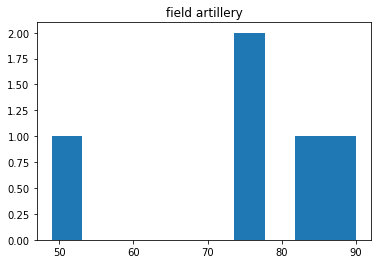

In [19]:
plt.hist(data1['field artillery'],bins=10)
plt.title("field artillery")
plt.show()

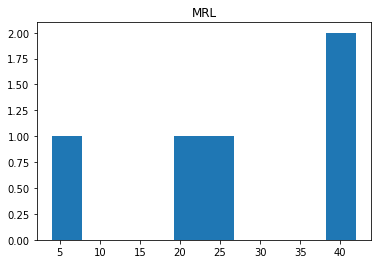

In [20]:
plt.hist(data1['MRL'],bins=10)
plt.title("MRL")
plt.show()

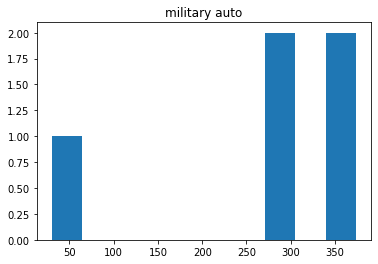

In [21]:
plt.hist(data1['military auto'],bins=10)
plt.title("military auto")
plt.show()

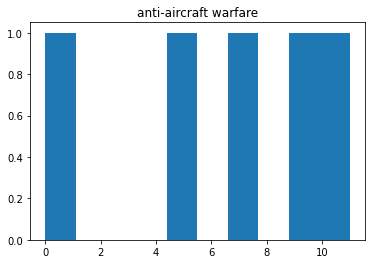

In [40]:
plt.hist(data1['anti-aircraft warfare'],bins=10)
plt.title("anti-aircraft warfare")
plt.show()

In [41]:
x=data1.drop(['date','day'],axis=1)

In [50]:
y=data1.drop(['day'],axis=1)

In [43]:
x.shape

(5, 12)

In [51]:
y.shape

(5, 13)

In [52]:
x = data1.iloc[:, 0:5].values
y = data1.iloc[:, 0:5].values

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(x,test_size=0.2, random_state=0)
y_train,y_test=train_test_split(y,test_size=0.2,random_state=0)